# Do a data analysis on the data NVDA.csv 

In [17]:
import polars as pl
import matplotlib.pyplot as plt
import datetime as dt

# Read the data

In [2]:
df = pl.read_csv('NVDA.csv')
df

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""1999-01-22""",0.4375,0.488281,0.388021,0.410156,0.376358,271468800
"""1999-01-25""",0.442708,0.458333,0.410156,0.453125,0.415786,51048000
"""1999-01-26""",0.458333,0.467448,0.411458,0.417969,0.383527,34320000
"""1999-01-27""",0.419271,0.429688,0.395833,0.416667,0.382332,24436800
"""1999-01-28""",0.416667,0.419271,0.41276,0.415365,0.381137,22752000
"""1999-01-29""",0.415365,0.416667,0.395833,0.395833,0.363215,24403200
"""1999-02-01""",0.395833,0.40625,0.395833,0.403646,0.370384,15470400
"""1999-02-02""",0.395833,0.40625,0.360677,0.372396,0.341709,26409600
"""1999-02-03""",0.367188,0.385417,0.364583,0.380208,0.348877,7512000


# Check the data types

In [3]:
df.dtypes

[Utf8, Float64, Float64, Float64, Float64, Float64, Int64]

# Check the data

In [4]:
df.head(10)

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""1999-01-22""",0.4375,0.488281,0.388021,0.410156,0.376358,271468800
"""1999-01-25""",0.442708,0.458333,0.410156,0.453125,0.415786,51048000
"""1999-01-26""",0.458333,0.467448,0.411458,0.417969,0.383527,34320000
"""1999-01-27""",0.419271,0.429688,0.395833,0.416667,0.382332,24436800
"""1999-01-28""",0.416667,0.419271,0.41276,0.415365,0.381137,22752000
"""1999-01-29""",0.415365,0.416667,0.395833,0.395833,0.363215,24403200
"""1999-02-01""",0.395833,0.40625,0.395833,0.403646,0.370384,15470400
"""1999-02-02""",0.395833,0.40625,0.360677,0.372396,0.341709,26409600
"""1999-02-03""",0.367188,0.385417,0.364583,0.380208,0.348877,7512000


In [5]:
df.tail(10)

Date,Open,High,Low,Close,Adj Close,Volume
str,f64,f64,f64,f64,f64,i64
"""2023-05-08""",285.220001,292.200012,283.5,291.51001,291.51001,34497900
"""2023-05-09""",288.98999,289.730011,284.5,285.709991,285.709991,31486900
"""2023-05-10""",290.049988,291.130005,284.609985,288.850006,288.850006,36935000
"""2023-05-11""",288.959991,289.5,282.459991,285.779999,285.779999,32214900
"""2023-05-12""",285.290009,287.799988,280.459991,283.399994,283.399994,27402700
"""2023-05-15""",285.079987,289.690002,281.519989,289.529999,289.529999,29392600
"""2023-05-16""",288.410004,298.700012,288.320007,292.130005,292.130005,44940500
"""2023-05-17""",295.839996,301.98999,294.299988,301.779999,301.779999,43253500
"""2023-05-18""",304.100006,318.279999,303.200012,316.779999,316.779999,74872500


In [6]:
df.shape

(6122, 7)

In [7]:
df.describe()

describe,Date,Open,High,Low,Close,Adj Close,Volume
str,str,f64,f64,f64,f64,f64,f64
"""count""","""6122""",6122.0,6122.0,6122.0,6122.0,6122.0,6122.0
"""null_count""","""0""",0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",null,32.083172,32.698178,31.452291,32.105539,31.846044,6.1284e7
"""std""",null,61.979191,63.229129,60.681098,62.022923,62.028533,4.4008e7
"""min""","""1999-01-22""",0.348958,0.355469,0.333333,0.341146,0.313034,1.968e6
"""max""","""2023-05-19""",335.170013,346.470001,320.359985,333.76001,333.3508,9.230856e8
"""median""",null,4.32,4.4125,4.245,4.335,3.981222,5.13822e7
"""25%""",null,2.6775,2.758333,2.603333,2.6775,2.456865,3.43824e7
"""75%""",null,27.73,27.9725,27.1,27.690001,27.334064,7.45772e7


In [8]:
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [9]:
df['Date']

Date
str
"""1999-01-22"""
"""1999-01-25"""
"""1999-01-26"""
"""1999-01-27"""
"""1999-01-28"""
"""1999-01-29"""
"""1999-02-01"""
"""1999-02-02"""
"""1999-02-03"""


# covert the date to a usable format

In [25]:
def convert_date(date):
    return dt.datetime.strptime(date, '%Y-%m-%d')

# plot the data and do a time series analysis

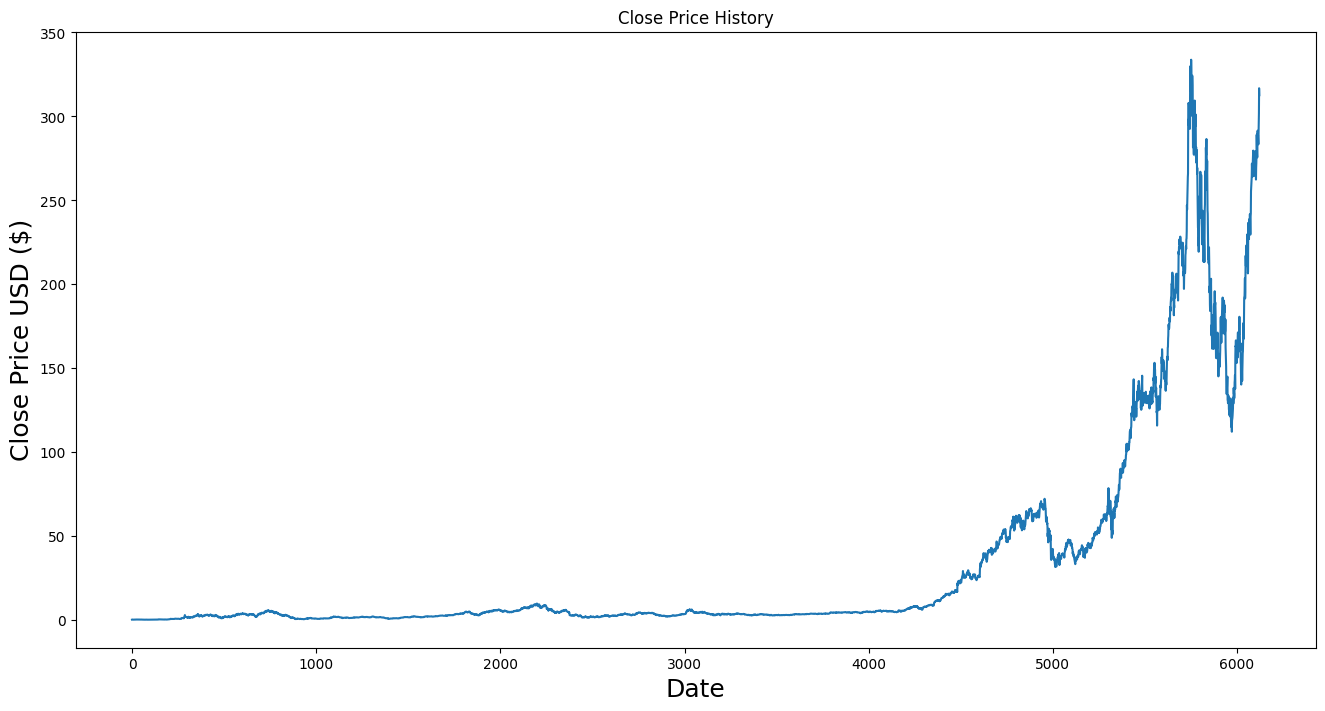

In [26]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

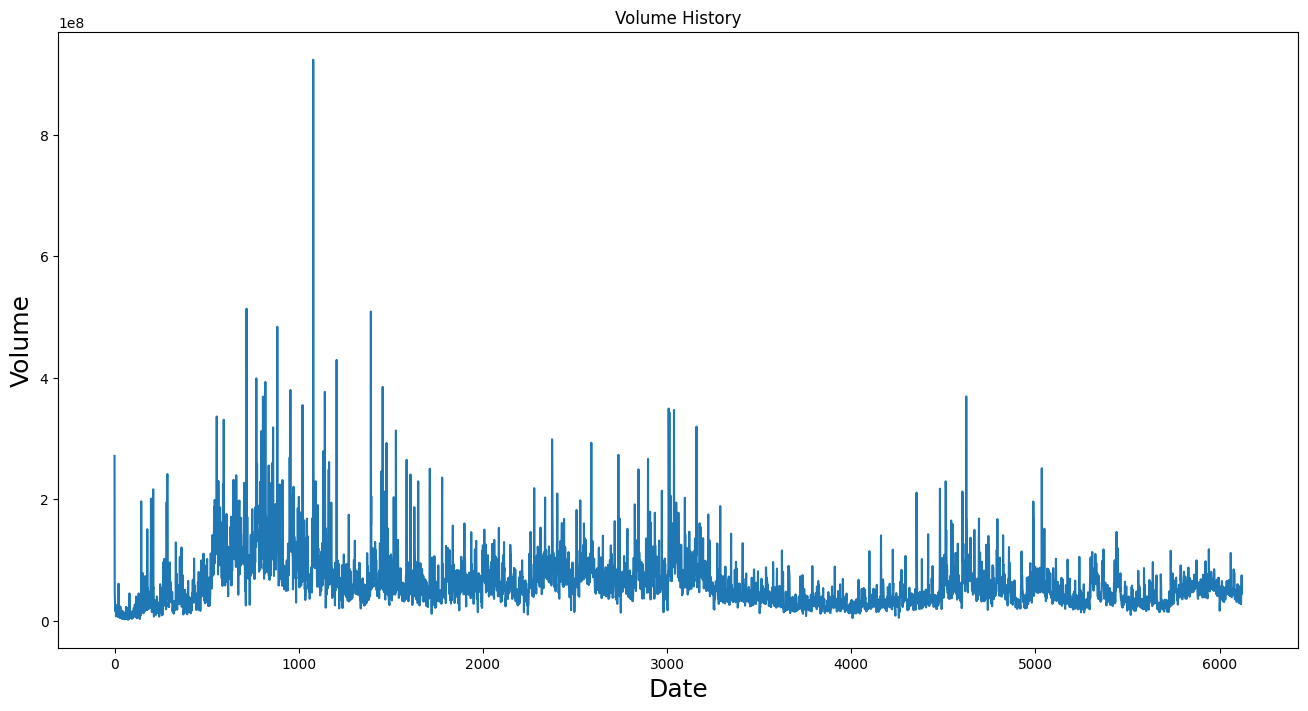

In [22]:
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(df['Volume'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.show()

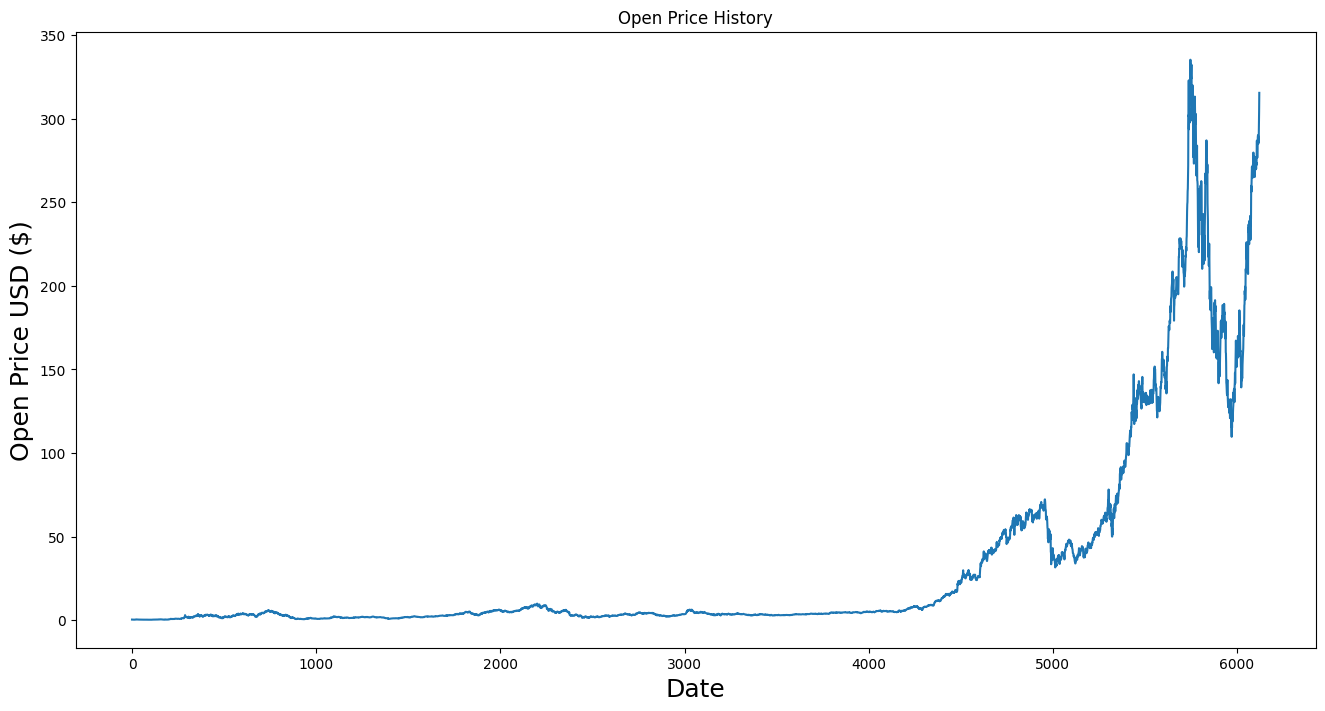

In [29]:
plt.figure(figsize=(16,8))
plt.title('Open Price History')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.show()

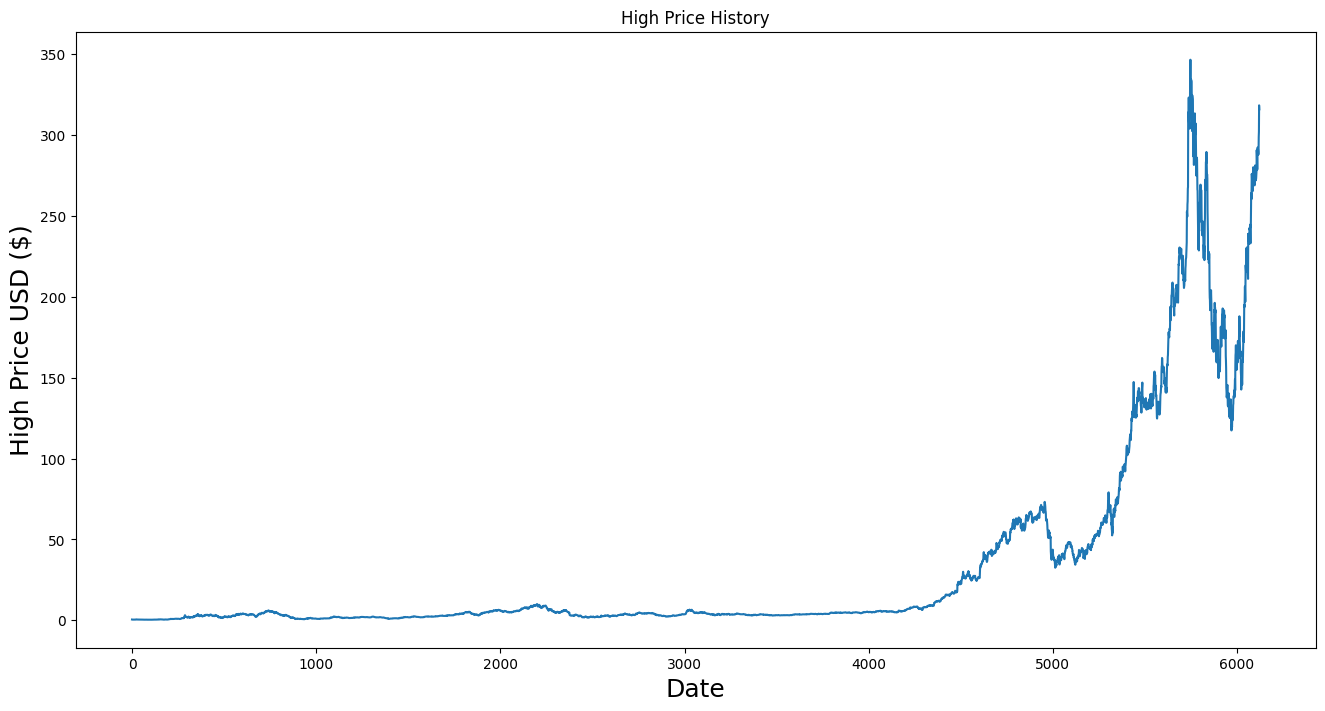

In [30]:
plt.figure(figsize=(16,8))
plt.title('High Price History')
plt.plot(df['High'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('High Price USD ($)', fontsize=18)
plt.show()

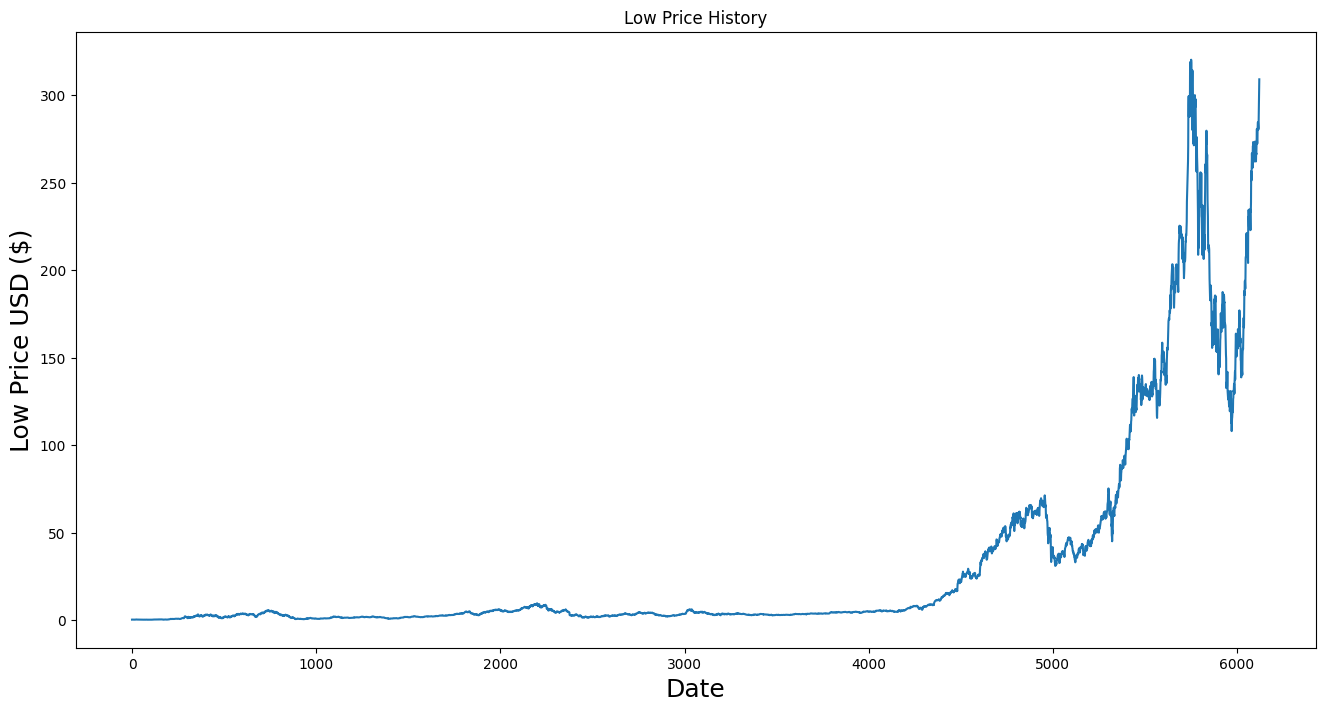

In [31]:
plt.figure(figsize=(16,8))
plt.title('Low Price History')
plt.plot(df['Low'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Low Price USD ($)', fontsize=18)
plt.show()

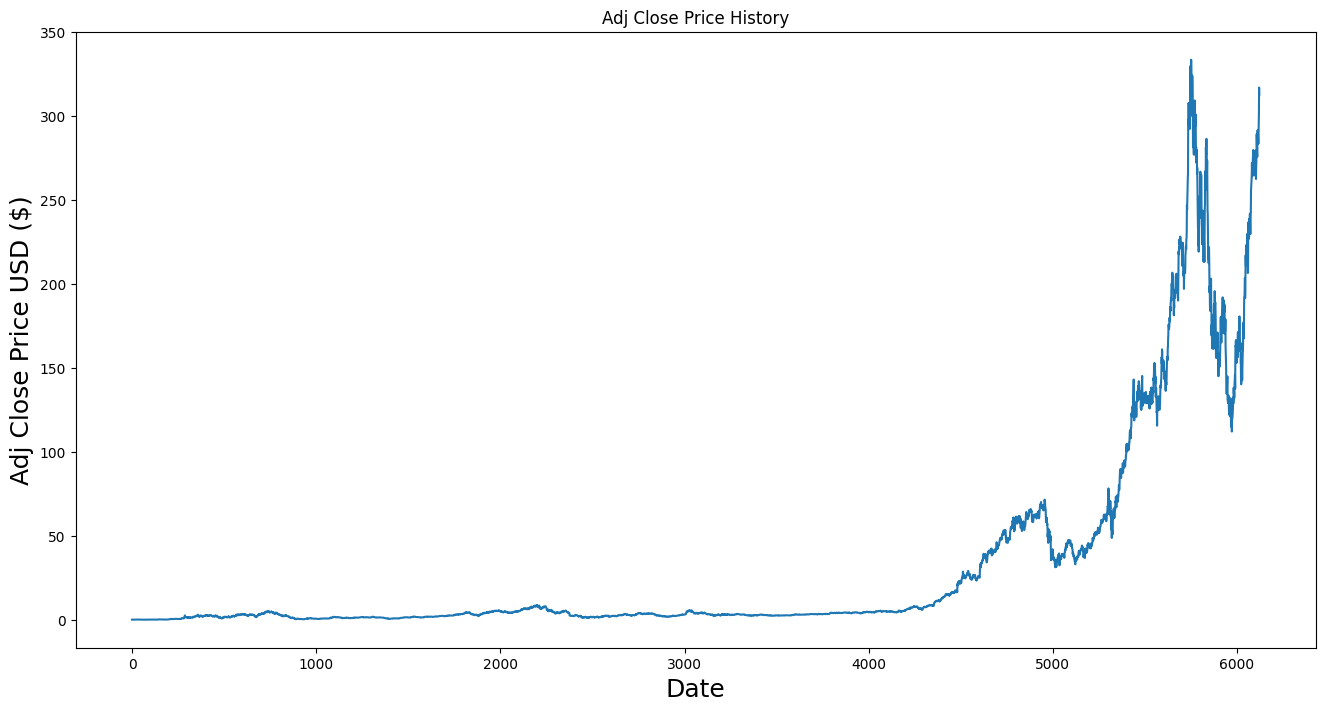

In [32]:
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

# Do a time series analysis on open price

In [35]:
df_open = df[['Date', 'Open']]
df_open

Date,Open
str,f64
"""1999-01-22""",0.4375
"""1999-01-25""",0.442708
"""1999-01-26""",0.458333
"""1999-01-27""",0.419271
"""1999-01-28""",0.416667
"""1999-01-29""",0.415365
"""1999-02-01""",0.395833
"""1999-02-02""",0.395833
"""1999-02-03""",0.367188
